In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Heiti TC']
import seaborn as sns
import numpy as np
import pylab
from datetime import date 
import scipy.stats as stats
from scipy.stats import shapiro,ttest_rel
from scipy.stats import pearsonr
from datetime import date, timedelta
import datetime
from natsort import natsorted
from statsmodels.stats.contingency_tables import mcnemar
from scipy.stats import chi2_contingency

In [2]:
for i in pd.read_excel("機構住民測驗題前測_202311060056_654839ca1368a.xlsx", sheet_name="前測").columns:
    print(i)

機構代碼
編號:
測驗日期:
題目1
題目2
題目3
題目4
題目5
題目6
題目7
題目8
題目9
題目10
題目11
題目12
題目13
題目14
題目15
題目16
題目17
題目18
題目19
題目20
題目21
題目22
題目23
題目24
題目25
題目26
題目27
題目28
題目29
題目30
題目31
題目32
題目33
題目34
題目35
題目36
題目37
題目38
1.1 出生年月：
1.2 性別：
1.3婚姻狀態(非必填)：
其他
1.4最高學歷：
1.5 職業(非必填):
1.6 目前機構居住時間:_______年________月(以點做區隔)
1.7 合計機構居住時間:_________年________月(以點做區隔)
1.8目前平均月收入約(非必填):
1.9宗教信仰(非必填)：
1.10 吸菸習慣(非必填):
1.不吸菸，但有二手菸，每日吸到二手菸的時間約_______小時，已有______年(以點做區隔)(非必填)
2.目前吸菸，已吸______年，平均每天______支(以點做區隔)(非必填)
3.已戒菸，戒______年，以前每天約吸______支，吸________年。(以點做區隔)(非必填)
1.11 喝酒習慣(非必填):
1.目前喝酒，已喝______年，平均每天______CC，喝酒的種類:_________________________________(以點做區隔)(非必填)
2.已戒酒，戒______年，以前已喝__________年，平均每天______CC，喝酒的種類:__________________(以點做區隔)(非必填)
2.1高血壓
2.1.1是否服藥(非必填)
使用藥物名稱(非必填)
2.2糖尿病
2.2.1是否服藥(非必填)
使用藥物名稱(非必填).1
2.3血脂異常
2.3.1總膽固醇過高
2.3.1.1是否服藥(非必填)
使用藥物名稱(非必填).2
2.3.2三酸甘油酯過高
2.3.2.1是否服藥(非必填)
使用藥物名稱(非必填).3
2.3.3 高密度脂蛋白膽固醇過低
2.3.3.1是否服藥(非必填)
使用藥物名稱(非必填).4
2.3.4低密度脂蛋白膽固醇過高
2.3.4.1是否服藥(非必填)
使用藥物名稱(非必填).5
2.4缺血性心臟病
2.4.1是否服藥(非必填)
使用藥物名稱

In [3]:
before = pd.read_excel("機構住民測驗題前測_202311060056_654839ca1368a.xlsx", sheet_name="前測", usecols=['編號:', 'Unnamed: 119', '1.1 出生年月：', '1.2 性別：', '1.6 目前機構居住時間:_______年________月(以點做區隔)', '題目1', '題目2', '題目3', '題目4', '題目5', '題目6', '題目7', '題目8', '題目9', '題目10', '題目11', '題目12', '題目13', '題目14', '題目15', '題目16', '題目17', '題目18', '題目19', '題目20', '題目21', '題目22', '題目23', '題目24', '題目25', '題目26', '題目27', '題目28', '題目29', '題目30', '題目31', '題目32', '題目33', '題目34', '題目35', '題目36', '題目37', '題目38'], dtype={'1.6 目前機構居住時間:_______年________月(以點做區隔)': 'string'})
before.rename(columns={'編號:': 'ID', 'Unnamed: 119': '前測', '1.1 出生年月：':'出生', '1.2 性別：':'性別', '1.6 目前機構居住時間:_______年________月(以點做區隔)':'居住時間'}, inplace=True)
before['出生'] = pd.to_datetime(before['出生']).apply(lambda x: x.date())
before['年齡'] = before['出生'].apply(lambda x:(date.today()-x)/timedelta(days=365.2425))
before['性別'] = before['性別'].replace(['0.女', '1.男'], ['女', '男'])
before['居住時間(y)'], before['居住時間(m)'] = before['居住時間'].str.split('.', n=1).str
before['居住時間(m)'] = before['居住時間(m)'].fillna(0)
before['居住時間(m)'] = before['居住時間(m)'].apply(lambda x:int(x)/12)
before['居住時間(y)'] = before['居住時間(y)'].astype(int)
before['居住時間'] = before['居住時間(y)']+before['居住時間(m)']
before['居住時間'] = before['居住時間'].apply(lambda x:round(x, 1))
before['年齡'] = before['年齡'].apply(lambda x:round(x, 1))
before.drop_duplicates(inplace=True)

/var/folders/6f/v4g3dkkj0b54w0sc2l43bkqm0000gn/T/ipykernel_33918/1453108107.py:6: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  before['居住時間(y)'], before['居住時間(m)'] = before['居住時間'].str.split('.', n=1).str


In [4]:
after = pd.read_excel("機構住民測驗題前測_202311060056_654839ca1368a.xlsx", sheet_name="後測", usecols=['編號:', 'Unnamed: 51', '題目1', '題目2', '題目3', '題目4', '題目5', '題目6', '題目7', '題目8', '題目9', '題目10', '題目11', '題目12', '題目13', '題目14', '題目15', '題目16', '題目17', '題目18', '題目19', '題目20', '題目21', '題目22', '題目23', '題目24', '題目25', '題目26', '題目27', '題目28', '題目29', '題目30', '題目31', '題目32', '題目33', '題目34', '題目35', '題目36', '題目37', '題目38'])
after.rename(columns={'編號:': 'ID', 'Unnamed: 51': '後測'}, inplace=True)

In [5]:
pd.merge(before, after, on='ID')

,ID,題目1_x,題目2_x,題目3_x,題目4_x,題目5_x,題目6_x,題目7_x,題目8_x,題目9_x,題目10_x,題目11_x,題目12_x,題目13_x,題目14_x,題目15_x,題目16_x,題目17_x,題目18_x,題目19_x,題目20_x,題目21_x,題目22_x,題目23_x,題目24_x,題目25_x,題目26_x,題目27_x,題目28_x,題目29_x,題目30_x,題目31_x,題目32_x,題目33_x,題目34_x,題目35_x,題目36_x,題目37_x,題目38_x,出生,性別,居住時間,前測,年齡,居住時間(y),居住時間(m),題目1_y,題目2_y,題目3_y,題目4_y,題目5_y,題目6_y,題目7_y,題目8_y,題目9_y,題目10_y,題目11_y,題目12_y,題目13_y,題目14_y,題目15_y,題目16_y,題目17_y,題目18_y,題目19_y,題目20_y,題目21_y,題目22_y,題目23_y,題目24_y,題目25_y,題目26_y,題目27_y,題目28_y,題目29_y,題目30_y,題目31_y,題目32_y,題目33_y,題目34_y,題目35_y,題目36_y,題目37_y,題目38_y,後測
0,7,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,1935-05-17,男,3.4,38,88.6,3,0.416667,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,38
1,9,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,1935-05-07,男,6.4,38,88.6,6,0.416667,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,38
2,10,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,1933-09-14,男,6.4,38,90.2,6,0.416667,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,38
3,11,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,1930-09-02,女,6.4,38,93.3,6,0.416667,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,38
4,12,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,1942-09-24,男,6.4,38,81.2,6,0.416667,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,38
5,13,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,1943-04-08,女,1.9,38,80.7,1,0.916667,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,38
6,14,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,1960-09-03,女,4.2,38,63.3,4,0.250000,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,38
7,15,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,1971-03-24,男,1.9,38,52.7,1,0.916667,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,38
8,16,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,1951-04-26,男,4.4,38,72.6,4,0.416667,O,O,O,O,X,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,37
9,17,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,1956-06-29,男,0.8,38,67.4,0,0.750000,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,38


In [6]:
df = pd.merge(before, after, on='ID')
first_cols = ['ID', '出生', '性別', '居住時間', '年齡', '居住時間(y)', '居住時間(m)', '前測', '後測']
other_cols = natsorted(df.columns.difference(first_cols).tolist())
df = df.loc[:, first_cols+other_cols]
df

,ID,出生,性別,居住時間,年齡,居住時間(y),居住時間(m),前測,後測,題目1_x,題目1_y,題目2_x,題目2_y,題目3_x,題目3_y,題目4_x,題目4_y,題目5_x,題目5_y,題目6_x,題目6_y,題目7_x,題目7_y,題目8_x,題目8_y,題目9_x,題目9_y,題目10_x,題目10_y,題目11_x,題目11_y,題目12_x,題目12_y,題目13_x,題目13_y,題目14_x,題目14_y,題目15_x,題目15_y,題目16_x,題目16_y,題目17_x,題目17_y,題目18_x,題目18_y,題目19_x,題目19_y,題目20_x,題目20_y,題目21_x,題目21_y,題目22_x,題目22_y,題目23_x,題目23_y,題目24_x,題目24_y,題目25_x,題目25_y,題目26_x,題目26_y,題目27_x,題目27_y,題目28_x,題目28_y,題目29_x,題目29_y,題目30_x,題目30_y,題目31_x,題目31_y,題目32_x,題目32_y,題目33_x,題目33_y,題目34_x,題目34_y,題目35_x,題目35_y,題目36_x,題目36_y,題目37_x,題目37_y,題目38_x,題目38_y
0,7,1935-05-17,男,3.4,88.6,3,0.416667,38,38,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O
1,9,1935-05-07,男,6.4,88.6,6,0.416667,38,38,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O
2,10,1933-09-14,男,6.4,90.2,6,0.416667,38,38,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O
3,11,1930-09-02,女,6.4,93.3,6,0.416667,38,38,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O
4,12,1942-09-24,男,6.4,81.2,6,0.416667,38,38,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O
5,13,1943-04-08,女,1.9,80.7,1,0.916667,38,38,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O
6,14,1960-09-03,女,4.2,63.3,4,0.250000,38,38,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O
7,15,1971-03-24,男,1.9,52.7,1,0.916667,38,38,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O
8,16,1951-04-26,男,4.4,72.6,4,0.416667,38,37,O,O,O,O,O,O,O,O,O,X,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O
9,17,1956-06-29,男,0.8,67.4,0,0.750000,38,38,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O


In [7]:
# 顯示連續變量欄位的分佈
df.describe()

,ID,居住時間,年齡,居住時間(y),居住時間(m),前測,後測
count,20.000000,20.00000,20.000000,20.000000,20.000000,20.0,20.000000
mean,17.450000,3.46000,76.585000,3.000000,0.466667,38.0,37.950000
std,6.004165,3.21598,10.962533,3.244428,0.259892,0.0,0.223607
min,7.000000,0.10000,52.700000,0.000000,0.083333,38.0,37.000000
25%,12.750000,1.32500,68.075000,1.000000,0.333333,38.0,38.000000
50%,17.500000,2.25000,76.600000,1.500000,0.416667,38.0,38.000000
75%,22.250000,4.90000,86.450000,4.500000,0.604167,38.0,38.000000
max,27.000000,13.50000,93.300000,13.000000,0.916667,38.0,38.000000


In [8]:
# 顯示類別變量欄位的分佈
df.describe(include='object')

,出生,性別,題目1_x,題目1_y,題目2_x,題目2_y,題目3_x,題目3_y,題目4_x,題目4_y,題目5_x,題目5_y,題目6_x,題目6_y,題目7_x,題目7_y,題目8_x,題目8_y,題目9_x,題目9_y,題目10_x,題目10_y,題目11_x,題目11_y,題目12_x,題目12_y,題目13_x,題目13_y,題目14_x,題目14_y,題目15_x,題目15_y,題目16_x,題目16_y,題目17_x,題目17_y,題目18_x,題目18_y,題目19_x,題目19_y,題目20_x,題目20_y,題目21_x,題目21_y,題目22_x,題目22_y,題目23_x,題目23_y,題目24_x,題目24_y,題目25_x,題目25_y,題目26_x,題目26_y,題目27_x,題目27_y,題目28_x,題目28_y,題目29_x,題目29_y,題目30_x,題目30_y,題目31_x,題目31_y,題目32_x,題目32_y,題目33_x,題目33_y,題目34_x,題目34_y,題目35_x,題目35_y,題目36_x,題目36_y,題目37_x,題目37_y,題目38_x,題目38_y
count,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
unique,20,2,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,1935-05-17,男,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O
freq,1,12,20,20,20,20,20,20,20,20,20,19,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20


([<matplotlib.patches.Wedge at 0x12d6eaeb0>,
 [Text(-0.3399187721714582, 1.046162142464278, '男'),
  Text(0.3399188701202255, -1.046162110638781, '女')],
 [Text(-0.18541023936624992, 0.5706338958896061, '60.0%\n(12)'),
  Text(0.18541029279285026, -0.5706338785302442, '40.0%\n(8)')])

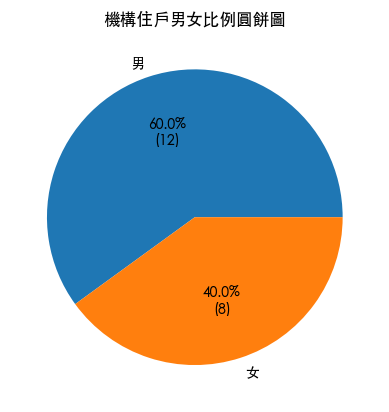

In [9]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

s = df['性別'].value_counts()
plt.title('機構住戶男女比例圓餅圖')
plt.pie(s,labels = s.index, autopct=autopct_format(s))

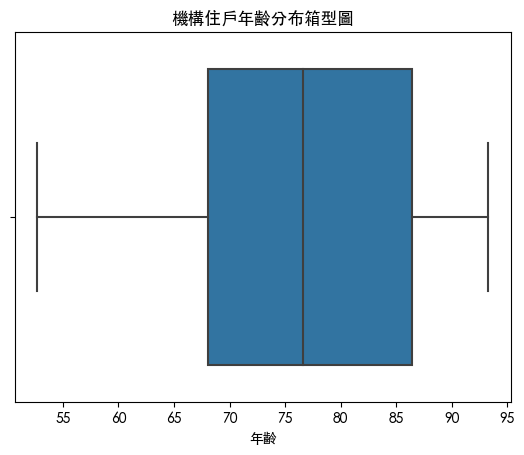

In [10]:
tmp = df[(df['年齡']<100)&(df['年齡']>18)]
sns.boxplot(x=tmp["年齡"],data=tmp)
plt.title("機構住戶年齡分布箱型圖")
plt.show()

Text(0.5, 1.0, '機構住戶年齡分布直方圖')

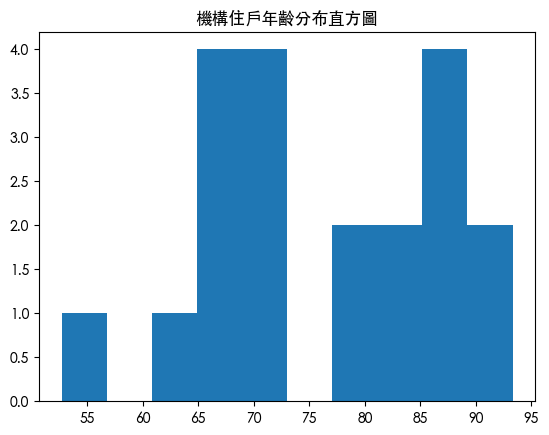

In [11]:
plt.hist(tmp['年齡'])
plt.title("機構住戶年齡分布直方圖")

In [12]:
print(tmp['年齡'].mean())
print(tmp['年齡'].max())
print(tmp['年齡'].min())

76.58500000000001
93.3
52.7


Text(0.5, 1.0, '機構住民居住時間分布直方圖')

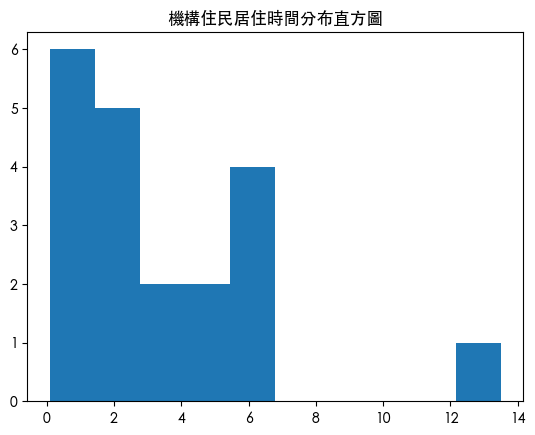

In [13]:
plt.hist(df['居住時間'])
plt.title("機構住民居住時間分布直方圖")

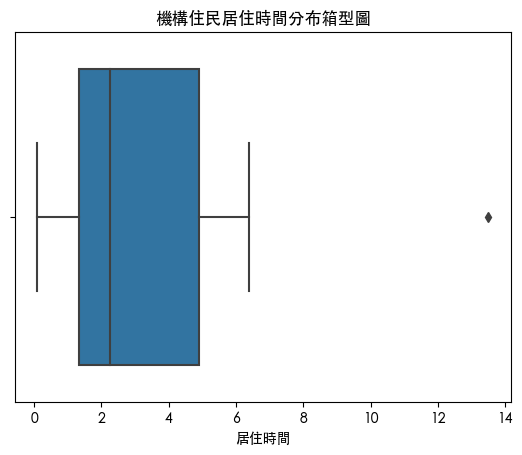

In [14]:
sns.boxplot(x=df["居住時間"],data=df)
plt.title("機構住民居住時間分布箱型圖")
plt.show()

### McNemar

In [15]:
target = []
for i in range(1, 39):
    target.append(f'題目{i}')
for i in target:
    print(i)
    X = f'{i}_x'
    Y = f'{i}_y'
    print('前測答對人數', str(len(df[df[X]=='O'])))
    print('後測答對人數', str(len(df[df[Y]=='O'])))
    # 創建二分類的列聯表
    contingency_table = [[len(df[(df[X]=='O')&(df[Y]=='O')]), len(df[(df[X]=='O')&(df[Y]=='X')])],
                        [len(df[(df[X]=='X')&(df[Y]=='O')]), len(df[(df[X]=='X')&(df[Y]=='X')])]] 

    # 執行 McNemar 檢定
    result = mcnemar(contingency_table)

    # 顯示結果
    print("McNemar statistic:", result.statistic)
    print("P-value:", result.pvalue)

    # 判斷結果是否顯著
    alpha = 0.05
    if result.pvalue < alpha:
        print("統計上顯著，可以拒絕虛無假設，表示學習狀況有進步。")
    else:
        print("統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著進步。")
    print('='*50)

題目1
前測答對人數 20
後測答對人數 20
McNemar statistic: 0.0
P-value: 1.0
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著進步。
題目2
前測答對人數 20
後測答對人數 20
McNemar statistic: 0.0
P-value: 1.0
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著進步。
題目3
前測答對人數 20
後測答對人數 20
McNemar statistic: 0.0
P-value: 1.0
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著進步。
題目4
前測答對人數 20
後測答對人數 20
McNemar statistic: 0.0
P-value: 1.0
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著進步。
題目5
前測答對人數 20
後測答對人數 19
McNemar statistic: 0.0
P-value: 1.0
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著進步。
題目6
前測答對人數 20
後測答對人數 20
McNemar statistic: 0.0
P-value: 1.0
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著進步。
題目7
前測答對人數 20
後測答對人數 20
McNemar statistic: 0.0
P-value: 1.0
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著進步。
題目8
前測答對人數 20
後測答對人數 20
McNemar statistic: 0.0
P-value: 1.0
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著進步。
題目9
前測答對人數 20
後測答對人數 20
McNemar statistic: 0.0
P-value: 1.0
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著進步。
題目10
前測答對人數 20
後測答對人數 20
McNemar statistic: 0.0
P-value: 1.0
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著進步。
題目11
前測答對人數 20
後測答對人數 20
McNemar statistic: 0.0
P-value: 1.0
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著進步。
題目12
前測答對人數 20
後測答對

### 卡方分配

In [16]:
for i in target:
    try:
        print(i)
        X = f'{i}_x'
        Y = f'{i}_y'
        print('前測答對人數', str(len(df[df[X]=='O'])))
        print('後測答對人數', str(len(df[df[Y]=='O'])))
        # 創建二分類的列聯表
        contingency_table = [[len(df[(df[X]=='O')&(df[Y]=='O')]), len(df[(df[X]=='O')&(df[Y]=='X')])],
                            [len(df[(df[X]=='X')&(df[Y]=='O')]), len(df[(df[X]=='X')&(df[Y]=='X')])]] 
        # 執行卡方檢定
        result = chi2_contingency(contingency_table)

        # 顯示結果
        print("Chi-squared statistic:", result.statistic)
        print("P-value:", result.pvalue)

        # 判斷結果是否顯著
        alpha = 0.05
        if result.pvalue < alpha:
            print("統計上顯著，可以拒絕虛無假設，表示學習狀況有改善。")
        else:
            print("統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著改善。")
    except:
        pass
    print('='*50)

題目1
前測答對人數 20
後測答對人數 20
題目2
前測答對人數 20
後測答對人數 20
題目3
前測答對人數 20
後測答對人數 20
題目4
前測答對人數 20
後測答對人數 20
題目5
前測答對人數 20
後測答對人數 19
題目6
前測答對人數 20
後測答對人數 20
題目7
前測答對人數 20
後測答對人數 20
題目8
前測答對人數 20
後測答對人數 20
題目9
前測答對人數 20
後測答對人數 20
題目10
前測答對人數 20
後測答對人數 20
題目11
前測答對人數 20
後測答對人數 20
題目12
前測答對人數 20
後測答對人數 20
題目13
前測答對人數 20
後測答對人數 20
題目14
前測答對人數 20
後測答對人數 20
題目15
前測答對人數 20
後測答對人數 20
題目16
前測答對人數 20
後測答對人數 20
題目17
前測答對人數 20
後測答對人數 20
題目18
前測答對人數 20
後測答對人數 20
題目19
前測答對人數 20
後測答對人數 20
題目20
前測答對人數 20
後測答對人數 20
題目21
前測答對人數 20
後測答對人數 20
題目22
前測答對人數 20
後測答對人數 20
題目23
前測答對人數 20
後測答對人數 20
題目24
前測答對人數 20
後測答對人數 20
題目25
前測答對人數 20
後測答對人數 20
題目26
前測答對人數 20
後測答對人數 20
題目27
前測答對人數 20
後測答對人數 20
題目28
前測答對人數 20
後測答對人數 20
題目29
前測答對人數 20
後測答對人數 20
題目30
前測答對人數 20
後測答對人數 20
題目31
前測答對人數 20
後測答對人數 20
題目32
前測答對人數 20
後測答對人數 20
題目33
前測答對人數 20
後測答對人數 20
題目34
前測答對人數 20
後測答對人數 20
題目35
前測答對人數 20
後測答對人數 20
題目36
前測答對人數 20
後測答對人數 20
題目37
前測答對人數 20
後測答對人數 20
題目38
前測答對人數 20
後測答對人數 20


### Fisher's Exact Test

In [17]:
from scipy.stats import fisher_exact
for i in target:
    try:
        print(i)
        X = f'{i}_x'
        Y = f'{i}_y'
        print('前測答對人數', str(len(df[df[X]=='O'])))
        print('後測答對人數', str(len(df[df[Y]=='O'])))
        # 創建二分類的列聯表
        contingency_table = [[len(df[(df[X]=='O')&(df[Y]=='O')]), len(df[(df[X]=='O')&(df[Y]=='X')])],
                            [len(df[(df[X]=='X')&(df[Y]=='O')]), len(df[(df[X]=='X')&(df[Y]=='X')])]]
         
        # 執行fisher_exact_test
        odds_ratio, p_value = fisher_exact(contingency_table)

        # 顯示結果
        print("Odds Ratio:", odds_ratio)
        print("P-value:", p_value)

        # 判斷結果是否顯著
        alpha = 0.05
        if p_value < alpha:
            print("統計上顯著，可以拒絕虛無假設，表示學習狀況有改善。")
        else:
            print("統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著改善。")
    except:
        pass
    print('='*50)

題目1
前測答對人數 20
後測答對人數 20
Odds Ratio: nan
P-value: 1.0
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著改善。
題目2
前測答對人數 20
後測答對人數 20
Odds Ratio: nan
P-value: 1.0
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著改善。
題目3
前測答對人數 20
後測答對人數 20
Odds Ratio: nan
P-value: 1.0
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著改善。
題目4
前測答對人數 20
後測答對人數 20
Odds Ratio: nan
P-value: 1.0
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著改善。
題目5
前測答對人數 20
後測答對人數 19
Odds Ratio: nan
P-value: 1.0
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著改善。
題目6
前測答對人數 20
後測答對人數 20
Odds Ratio: nan
P-value: 1.0
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著改善。
題目7
前測答對人數 20
後測答對人數 20
Odds Ratio: nan
P-value: 1.0
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著改善。
題目8
前測答對人數 20
後測答對人數 20
Odds Ratio: nan
P-value: 1.0
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著改善。
題目9
前測答對人數 20
後測答對人數 20
Odds Ratio: nan
P-value: 1.0
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著改善。
題目10
前測答對人數 20
後測答對人數 20
Odds Ratio: nan
P-value: 1.0
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著改善。
題目11
前測答對人數 20
後測答對人數 20
Odds Ratio: nan
P-value: 1.0
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著改善。
題目12
前測答對人數 20
後測答對人數 20
Odds Ratio: nan
P-value: 1.0
統計上不顯著，不能拒絕虛無假設，表示學習狀況無顯著改善。
題目13
前測答對人數 2

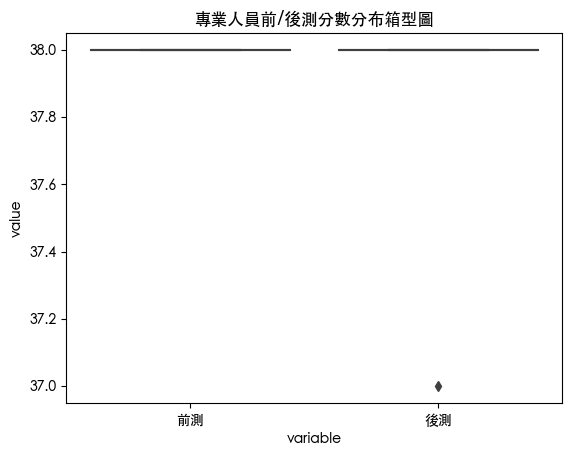

In [18]:
sns.boxplot(x="variable", y="value", data=pd.melt(df[['前測', '後測']]))
plt.title("專業人員前/後測分數分布箱型圖")
plt.show()

In [19]:
from scipy.stats import wilcoxon

# 使用 Wilcoxon 符號秩測試 雙尾檢定
statistic, p_value = wilcoxon(df['前測'].tolist(),  df['後測'].tolist(), alternative='two-sided')

# 顯示結果
print("Wilcoxon statistic:", statistic)
print("P-value:", p_value)

# 判斷結果是否顯著
alpha = 0.05
if p_value < alpha:
    print("統計上顯著，可以拒絕虛無假設，表示前後測有差異。")
else:
    print("統計上不顯著，不能拒絕虛無假設，表示前後測無差異。")

Wilcoxon statistic: 0.0
P-value: 0.31731050786291415
統計上不顯著，不能拒絕虛無假設，表示前後測無差異。


/Users/yasmine/miniconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Users/yasmine/miniconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


### 答對率長條圖

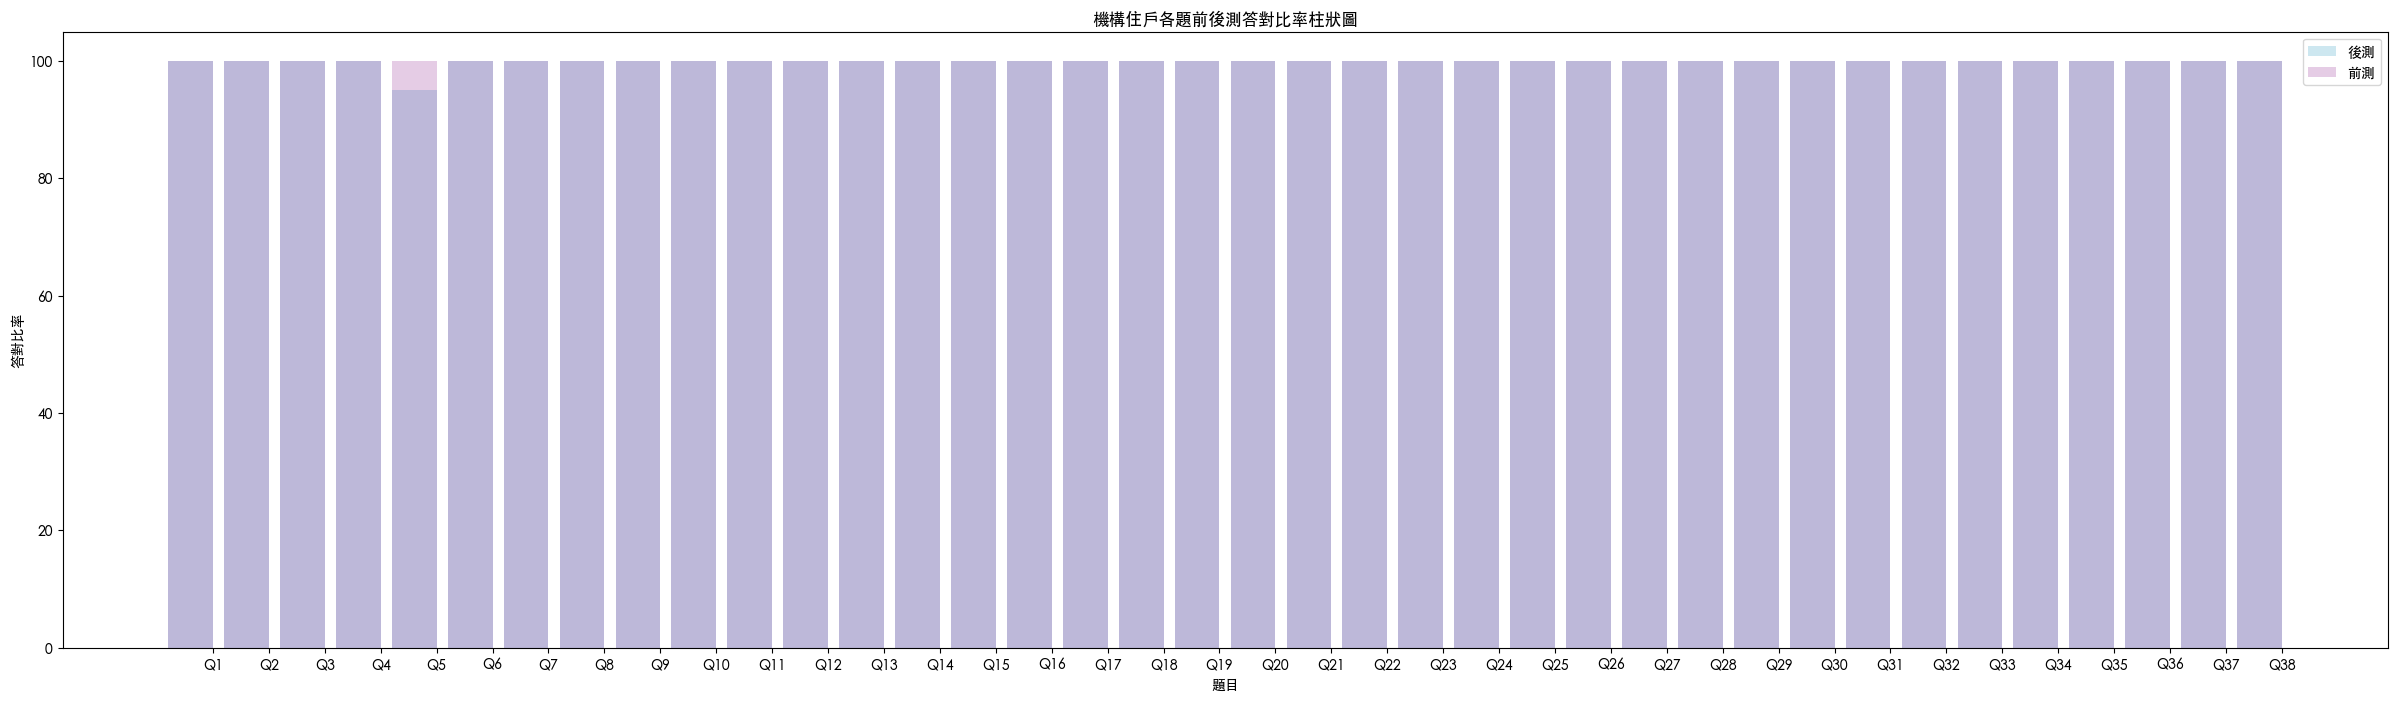

In [22]:
before_list = []
after_list = []
for i in target:
    X = f'{i}_x'
    Y = f'{i}_y'
    before_list.append(len(df[df[X]=='O'])/len(df)*100)
    after_list.append(len(df[df[Y]=='O'])/len(df)*100)

width = 0.8
indices = np.arange(len(before_list))
plt.figure(figsize=(30,8))
plt.bar(indices, after_list, width=width, 
        color='lightblue', alpha=0.6, label='後測')
plt.bar(indices, before_list,
        width=width, color='purple', alpha=0.2, label='前測')
plt.xticks(indices+width/2., 
           ['Q{}'.format(i) for i in range(1, len(before_list)+1)] )
plt.legend()
plt.title("機構住戶各題前後測答對比率柱狀圖")
plt.xlabel('題目')
plt.ylabel('答對比率')
plt.show()